# Data Preprocessing II

This tutorial contains Python examples for data transformation, focusing on techniques for data normalization and discretization, . Follow the step-by-step instructions below carefully. To execute the code, click on the corresponding cell and press the SHIFT+ENTER keys simultaneously.

## Data Transformation I

Sometimes, the original values of an attribute might not be ideally suited for data analysis or modeling purposes. Data transformation is a process that involves converting the entire set of an attribute's values into  a new series of values. The approach is strategically utilized to improve the suitability of the data for different data mining objectives, facilitate more effective analyses, and potentially improve model accuracy and efficiency.

In this tutorial, we'll focus on the "LotArea" attribute from the house price dataset, exploring transformation functions, data normalization, and data discretization.

### Importing Libraries and Configuration

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from scipy.special import boxcox1p
from scipy.stats import skew
%matplotlib inline
from matplotlib.pylab import rcParams


### Settings

In [3]:
# Set the default figure size for matplotlib plots to 15 inches wide by 6 inches tall
rcParams["figure.figsize"] = (15, 6)

# Increase the default font size of the titles in matplotlib plots to extra-extra-large
rcParams["axes.titlesize"] = "xx-large"

# Make the titles of axes in matplotlib plots bold for better visibility
rcParams["axes.titleweight"] = "bold"

# Set the default location of the legend in matplotlib plots to the upper left corner
rcParams["legend.loc"] = "upper left"

# Configure pandas to display all columns of a DataFrame when printed to the console
pd.set_option('display.max_columns', None)

# Configure pandas to display all rows of a DataFrame when printed to the console
pd.set_option('display.max_rows', None)


### Load Data

In [31]:
data = datasets.fetch_openml(name="house_prices", as_frame=True)
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target
print('Number of samples = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))
display (df.head(n=10))

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Number of samples = 1460
Number of attributes = 81


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MedHouseVal
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,None,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Brk



### Transformation Functions.
Transformation functions systematically adjust data values. In the following example, we'll apply a Box-Cox power transformation to the "LotArea" attribute, aiming to reduce skewness and achieve a more symmetric distribution.

Skewness before transformation: 12.195142125084478
Skewness after transformation: 0.4281475593423937


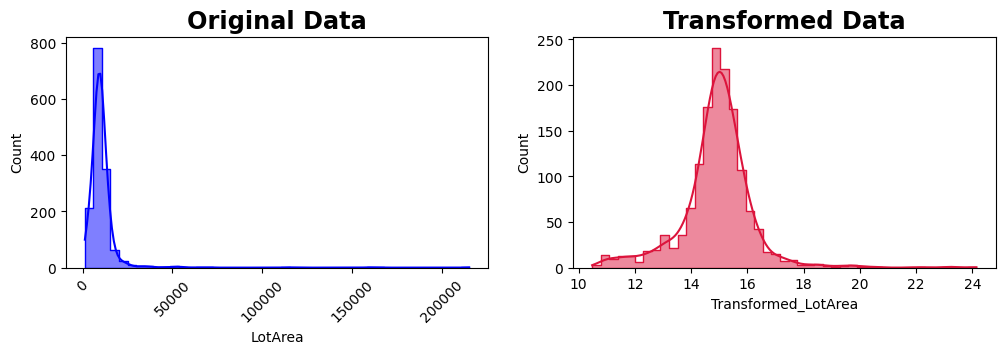

In [66]:
skewness_before = skew(df["LotArea"])
print(f"Skewness before transformation: {skewness_before}")

# Apply the Box-Cox transformation (boxcox1p)
lambda_value = 0.1  # A commonly used lambda value for Box-Cox in many scenarios
df["Transformed_LotArea"] = boxcox1p(df["LotArea"], lambda_value)

# Calculate the skewness after transformation
skewness_after = skew(df["Transformed_LotArea"])
print(f"Skewness after transformation: {skewness_after}")

# Plotting the original and transformed data
fig, ax = plt.subplots(1, 2, figsize=(12, 3))

sns.histplot(df["LotArea"], ax=ax[0], kde=True, bins=45, element='step', color='blue')
ax[0].set_title("Original Data")
# rotate x-axis labels
for label in ax[0].get_xticklabels():
    label.set_rotation(45)

sns.histplot(df["Transformed_LotArea"], ax=ax[1], kde=True,  bins=45, element='step', color="crimson")
ax[1].set_title("Transformed Data")

plt.show()


### Data Normalization
Data normalization scales dataset values to a uniform range, crucial for balanced attribute influence in data mining models. The primary methods are:
- Min-max normalization
- Z-score normalization
- Decimal scaling
We will demonstrate these techniques on the "LotArea" attribute in the example below.

In [37]:
# Min-Max Normalization
min_max_scaler = MinMaxScaler()
df['Min_Max_Normalized_LotArea'] = min_max_scaler.fit_transform(df[['LotArea']]   )

# Z-Score Normalization (Standardization)
standard_scaler = StandardScaler()
df['Z_Score_Normalized_LotArea'] = standard_scaler.fit_transform(df[['LotArea']]   )

# Decimal Scaling - Manual implementation as before
max_abs_value = df['LotArea'] .abs().max()
num_decimal_places = np.ceil(np.log10(max_abs_value))
df['Decimal_Scaling_Normalized_LotArea'] = df['LotArea']  / (10**num_decimal_places)

# Display the first few rows to verify
display(df[['LotArea', 'Min_Max_Normalized_LotArea', 'Z_Score_Normalized_LotArea', 'Decimal_Scaling_Normalized_LotArea']].head())


,LotArea,Min_Max_Normalized_LotArea,Z_Score_Normalized_LotArea,Decimal_Scaling_Normalized_LotArea
0,8450,0.033420,-0.207142,0.00845
1,9600,0.038795,-0.091886,0.00960
2,11250,0.046507,0.073480,0.01125
3,9550,0.038561,-0.096897,0.00955
4,14260,0.060576,0.375148,0.01426


### Data Discretization

Data discretization transforms continuous data into discrete categories or intervals, simplifying the analysis of complex relationships.

- Binning: Grouping data into categories.
- Histogram Analysis: Visualizing data distribution across intervals.
- Clustering Analysis: Organizing data into clusters based on similarity.

We will apply these techniques to the "LotArea" attribute in the upcoming example.

#### Binning


In [55]:
# Equal-width binning into 4 bins
df['LotArea_Equalwidth'] = pd.cut(df['LotArea'], bins=4, labels=["Small", "Medium", "Large", "Very Large"])
display(df[['LotArea', 'LotArea_Equalwidth']].head())
display(df['LotArea_Equalwidth'].value_counts())

# Equal-depth binning into 4 bins
df['LotArea_EqualDepth'] = pd.qcut(df['LotArea'], q=4, labels=["Small", "Medium", "Large", "Very Large"])
display(df[['LotArea', 'LotArea_EqualDepth']].head())
display(df[ 'LotArea_EqualDepth'].value_counts())



,LotArea,LotArea_Equalwidth
0,8450,Small
1,9600,Small
2,11250,Small
3,9550,Small
4,14260,Small


Small         1453
Medium           3
Large            2
Very Large       2
Name: LotArea_Equalwidth, dtype: int64

,LotArea,LotArea_EqualDepth
0,8450,Medium
1,9600,Large
2,11250,Large
3,9550,Large
4,14260,Very Large


Small         365
Medium        365
Large         365
Very Large    365
Name: LotArea_EqualDepth, dtype: int64

#### Histogram analysis


<ipython-input-57-ae5dbfa96a3a>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df["LotArea"], kde=True, bins=45, element='step', palette='tab10')


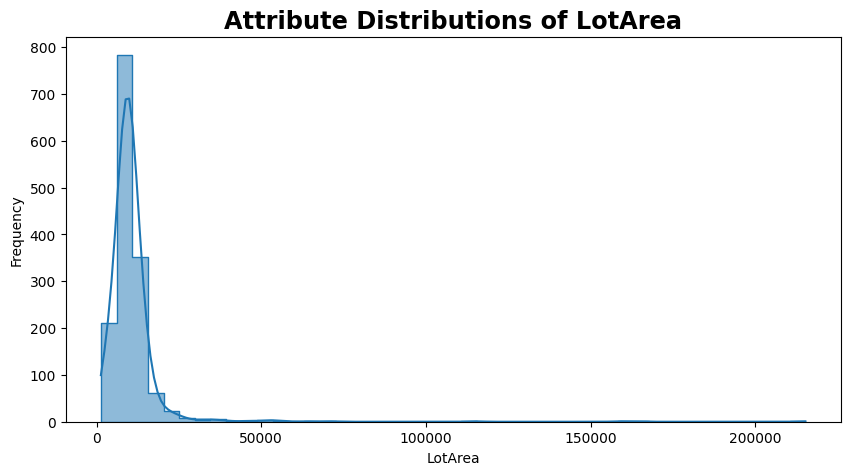

In [57]:
plt.figure(figsize=(10, 5))
sns.histplot(df["LotArea"], kde=True, bins=45, element='step', palette='tab10')
plt.title('Attribute Distributions of LotArea')
plt.ylabel('Frequency')
plt.show()

#### Clustering analysis

In [63]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(df[['LotArea']])

# Assign cluster labels to each data point for discretization
df['LotArea_Cluster'] = kmeans.labels_

# Optionally, you can map these cluster labels to more meaningful category names
cluster_mapping = {
    0: 'Cluster 1',
    1: 'Cluster 2',
    2: 'Cluster 3',
    3: 'Cluster 4'
}
df['LotArea_Cluster_Label'] = df['LotArea_Cluster'].map(cluster_mapping)

# Display the first few rows to see the clustering-based discretization
display(df[['LotArea', 'LotArea_Cluster', 'LotArea_Cluster_Label']].head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,LotArea,LotArea_Cluster,LotArea_Cluster_Label
0,8450,0,Cluster 1
1,9600,0,Cluster 1
2,11250,3,Cluster 4
3,9550,0,Cluster 1
4,14260,3,Cluster 4
